In [2]:
from bs4 import BeautifulSoup
import requests

In [3]:
url = 'https://results.eci.gov.in'
page = requests.get(url)
soup = BeautifulSoup(page.text,'html')

In [10]:
print(soup)

<!DOCTYPE html>
<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<!-- Bootstrap CSS -->
<link href="css/bootstrap.min.css" rel="stylesheet"/>
<link href="css/custom.css" rel="stylesheet"/>
<link href="css/responsive.css" rel="stylesheet"/>
<link href="css/font.css" rel="stylesheet"/>
<link href="img/icons/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<title>Election Commission of India</title>
<style type="text/css">
</style>
<script>!function(a){var e="https://s.go-mpulse.net/boomerang/",t="addEventListener";if("False"=="True")a.BOOMR_config=a.BOOMR_config||{},a.BOOMR_config.PageParams=a.BOOMR_config.PageParams||{},a.BOOMR_config.PageParams.pci=!0,e="https://s2.go-mpulse.net/boomerang/";if(window.BOOMR_API_key="C8JDA-BHWH8-9MQ5M-HKZCP-GH7SB",function(){function n(e){a.BOOMR_onload=e&&e.timeStamp||(new Date).getTime()}if(!a.BOOMR||!a.BOOMR.version&&!a.BOOMR.snippetExecuted){a.BOOMR

In [13]:
page_title = soup.title.string if soup.title else "No Title Found"
print(f"Page Title: {page_title}")

Page Title: Election Commission of India


In [14]:
main_heading = soup.find('div', class_='page-title')
main_heading_text = main_heading.h1.string if main_heading and main_heading.h1 else "No Main Heading Found"
print(f"Main Heading: {main_heading_text}")

Main Heading: General Election to Parliamentary/Assembly Constituencies: Trends & Results June-2024


In [15]:
disclaimer = soup.find('div', class_='dis-info')
disclaimer_text = disclaimer.p.text if disclaimer and disclaimer.p else "No Disclaimer Found"
print(f"Disclaimer: {disclaimer_text}")

Disclaimer:  ECI is displaying the information as being filled in the system by the Returning Officers from their respective Counting Centres.The final data for each AC/PC will be shared in Form-20.


In [16]:
parliamentary_info = soup.find('div', class_='state-item blue-bg pc-wrap')
if parliamentary_info:
    parliamentary_title = parliamentary_info.find('h2').text.strip() if parliamentary_info.find('h2') else "No Title Found"
    parliamentary_count = parliamentary_info.find('h1').text.strip() if parliamentary_info.find('h1') else "No Count Found"
    print(f"{parliamentary_title}: {parliamentary_count}")

Parliamentary Constituencies: 543


In [17]:
state_info = soup.find_all('div', class_='state-item')
for state in state_info[1:]:  # Skipping the first item as it's for parliamentary constituencies
    state_name = state.find('h2').text.strip() if state.find('h2') else "No State Name Found"
    state_count = state.find('h1').text.strip() if state.find('h1') else "No State Count Found"
    state_type = state.find('h5').text.strip() if state.find('h5') else ""
    print(f"{state_name}: {state_count} {state_type}")

Andhra Pradesh: 175 Assembly Constituencies
Odisha: 147 Assembly Constituencies
Bye Elections: 25 Assembly Constituencies


In [23]:
arunachal_link = soup.find('a', string='Arunachal Pradesh')
arunachal_link_href = arunachal_link['href'] if arunachal_link else "No Link Found"
print(f"Arunachal Pradesh Link: {arunachal_link_href}")

Arunachal Pradesh Link: https://results.eci.gov.in/AcResultGen2ndJune2024/index.htm


In [24]:
sikkim_link = soup.find('a', string='Sikkim')
sikkim_link_href = sikkim_link['href'] if sikkim_link else "No Link Found"
print(f"Sikkim Link: {sikkim_link_href}")

Sikkim Link: https://results.eci.gov.in/AcResultGen2ndJune2024/index.htm


In [25]:
import matplotlib.pyplot as plt

In [26]:
parliamentary_constituencies = 543
states = ['Andhra Pradesh', 'Odisha', 'Bye Elections']
assembly_constituencies = [175, 147, 25]

In [27]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

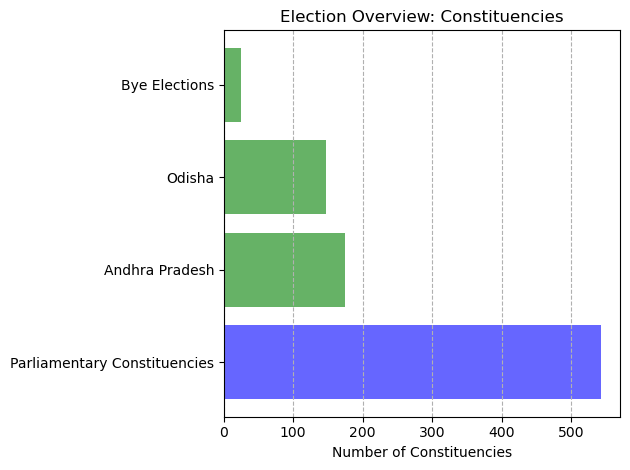

In [31]:
plt.barh('Parliamentary Constituencies', parliamentary_constituencies, color='blue', alpha=0.6)
for i, state in enumerate(states):
    plt.barh(state, assembly_constituencies[i], color='green', alpha=0.6)

plt.title('Election Overview: Constituencies')
plt.xlabel('Number of Constituencies')
plt.grid(axis='x', linestyle='--')

plt.tight_layout()
plt.show()